In [ ]:
!pip install tensorflow

In [52]:
# import tf.keras.preprocessing.text.Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/NLP 7th sem/dataset/Sarcasm_Headlines_Dataset_v2.json', lines = True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [53]:
df.drop('article_link', axis=1, inplace=True)
df.columns = [ 'labels' ,  'text']

In [54]:
from sklearn.model_selection import train_test_split


# The input text, example could be list of sentences
texts = df['text'].values.tolist()

# The labels corresponding to the input text
labels = df['labels'].values.tolist()

# Hyperparameters
max_words = 10000 # max number of words to use in the vocabulary
max_len = 100 # max length of each text (in terms of number of words)
embedding_dim = 100 # dimension of word embeddings
lstm_units = 64 # number of units in the LSTM layer
num_classes = len(set(labels)) # number of classes

In [55]:
import tensorflow as tf
import keras

# Tokenize the texts and create a vocabulary
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences so they all have the same length
x = pad_sequences(sequences, maxlen=max_len)

# Create one-hot encoded labels
y = keras.utils.to_categorical(labels, num_classes)


In [68]:
print(texts[0])
print(y[0])

thirtysomething scientists unveil doomsday clock of hair loss
[0. 1.]


In [56]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split ( x , y ,  random_state=24,  train_size=0.8 )


# Training

In [57]:

# Build the model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(lstm_units))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
716/716 [==============================] - 72s 96ms/step - loss: 0.4179 - accuracy: 0.8157
Epoch 2/10
716/716 [==============================] - 70s 97ms/step - loss: 0.2224 - accuracy: 0.9117
Epoch 3/10
716/716 [==============================] - 67s 94ms/step - loss: 0.1403 - accuracy: 0.9480
Epoch 4/10
716/716 [==============================] - 68s 95ms/step - loss: 0.0869 - accuracy: 0.9686
Epoch 5/10
716/716 [==============================] - 66s 92ms/step - loss: 0.0526 - accuracy: 0.9816
Epoch 6/10
716/716 [==============================] - 69s 96ms/step - loss: 0.0336 - accuracy: 0.9883
Epoch 7/10
716/716 [==============================] - 69s 97ms/step - loss: 0.0226 - accuracy: 0.9923
Epoch 8/10
716/716 [==============================] - 66s 92ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 9/10
716/716 [==============================] - 68s 95ms/step - loss: 0.0137 - accuracy: 0.9955
Epoch 10/10
716/716 [==============================] - 68s 95ms/step - loss: 0.009

In [58]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1042370 (3.98 MB)
Trainable params: 1042370 (3.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:

# Save the weights
model.save_weights('/content/drive/MyDrive/NLP 7th sem/weights/LSTM_sarcasm_detection/LSTM_model')

# Create a new model instance
# model = create_model()

# Restore the weights
# model.load_weights('/content/drive/MyDrive/NLP 7th sem/weights/LSTM_sarcasm_detection/LSTM_model')


# Test

In [60]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(" model, accuracy: {:5.2f}%".format(100 * acc))


179/179 - 5s - loss: 0.9902 - accuracy: 0.8340 - 5s/epoch - 29ms/step
 model, accuracy: 83.40%


In [63]:
pred_op=[]
pred_test = model.predict(X_test)
for i in range(len(pred_test)) :
  if pred_test[i][0] > pred_test[i][1] :
    pred_op.append(0)
  else :
    pred_op.append(1)

y_label = []
for i in range(len(y_test)) :
  if y_test[i][0] > y_test[i][1] :
    y_label.append(0)
  else :
    y_label.append(1)

179/179 [==============================] - 4s 19ms/step


[[2487  514]
 [ 436 2287]]


<Axes: >

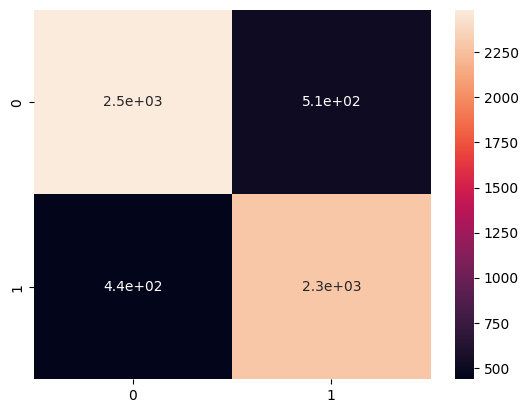

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_label, pred_op)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

# Prediction

In [76]:
predict_text = ["wind will blow like air","tomorrow is sunday" , "leader is more like strom" , "mad scientist developed good things"]
predict_sequence = tokenizer.texts_to_sequences(predict_text)
xip = pad_sequences(predict_sequence, maxlen=max_len)


In [77]:
predixt = model.predict(xip)
for i in range(len(predixt)) :
  print(predict_text[i])
  print(predixt[i])
  if predixt[i][0] > predixt[i][1] :
    print("not sarcastic \n")
  else :
    print(" sarcastic \n")



1/1 [==============================] - 0s 36ms/step
wind will blow like air
[0.00822802 0.991772  ]
 sarcastic 

tomorrow is sunday
[9.9994612e-01 5.3938773e-05]
not sarcastic 

leader is more like strom
[9.9971277e-01 2.8718272e-04]
not sarcastic 

mad scientist developed good things
[3.7951893e-06 9.9999619e-01]
 sarcastic 

